# __TASK 13 - Handling Missing Data, Filling and Replacing Values, Removing Duplicates, Detecting and Removing Outliers. Decision Trees__

In [304]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [305]:
df = sns.load_dataset("titanic")
df


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


# __Finding null values__

In [306]:

df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [307]:
# finding Percentage of null values
df.isnull().sum() *100 / len(df)

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

# __Droping Columns__

In [308]:
df.shape

(891, 15)

In [309]:
df.drop( columns='deck', inplace=True)
df.shape

(891, 14)

# __FILLING NULL VALUES__ (IMPUTATION)

The choice between mean, median, or mode for filling NA values depends on the distribution of your data and the nature of the missing values.
- Mean: Normally distributed data without outliers
- Median: Skewed data or data with outliers
- Mode: Categorical data or data with multiple peaks



In [310]:
df['age'] = df.age.fillna(value= df['age'].mean())

In [311]:
df['embarked'] = df.embarked.fillna(value= df['embarked'].mode()[0])

In [312]:
df['embark_town'] = df.embark_town.fillna(value= df['embark_town'].mode()[0])

In [313]:
df.isnull().sum() *100 / len(df)

survived       0.0
pclass         0.0
sex            0.0
age            0.0
sibsp          0.0
parch          0.0
fare           0.0
embarked       0.0
class          0.0
who            0.0
adult_male     0.0
embark_town    0.0
alive          0.0
alone          0.0
dtype: float64

In [314]:
df.shape

(891, 14)

# __Removing Duplicates__

In [315]:
df.duplicated().sum()

111

In [316]:
df_duplicates =df[df.duplicated()]
df_duplicates.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
47,1,3,female,29.699118,0,0,7.7500,Q,Third,woman,False,Queenstown,yes,True
76,0,3,male,29.699118,0,0,7.8958,S,Third,man,True,Southampton,no,True
77,0,3,male,29.699118,0,0,8.0500,S,Third,man,True,Southampton,no,True
87,0,3,male,29.699118,0,0,8.0500,S,Third,man,True,Southampton,no,True
95,0,3,male,29.699118,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [317]:
df.drop_duplicates(inplace=True)

In [318]:
df.duplicated().sum()

0

In [319]:
# THESE WILL BE USED FOR REMOVING OUTLIERS WITH DIFFERENT METHODS

df2 = df
df3 = df

# __REMOVING OUTLIERS__

- There are e methods for removing outliers
1. By Visualization 
2. IQR
3. Zscore

__1. BY VISUALIZATIONS__

<Axes: ylabel='age'>

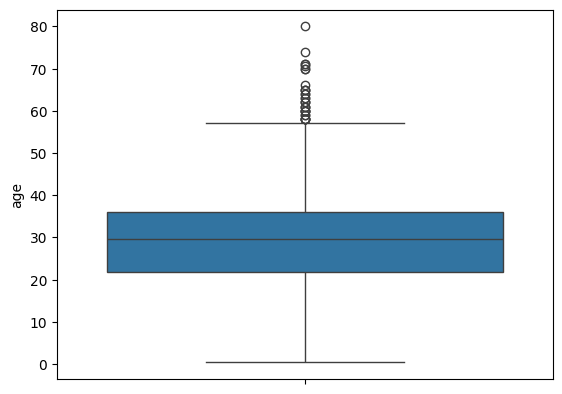

In [320]:
sns.boxplot(data=df, y="age")

# In this you can see there are outliers 

In [321]:
df =df[(df['age'] < 50) &(df['age']>7)]

<Axes: ylabel='age'>

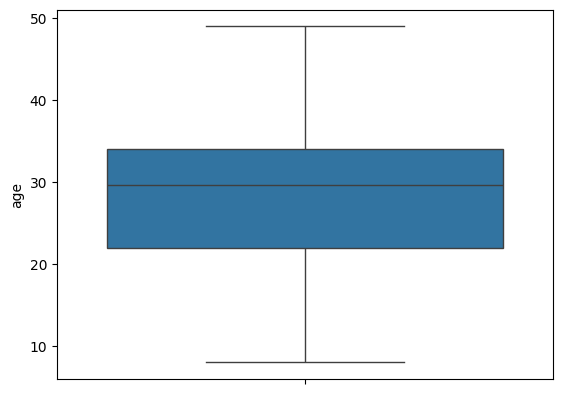

In [322]:
sns.boxplot(data=df, y="age")

<Axes: ylabel='fare'>

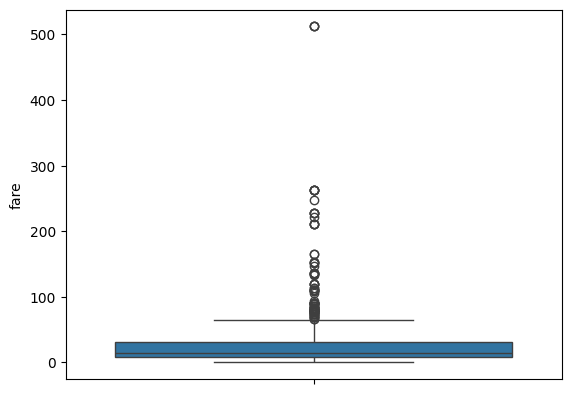

In [323]:
sns.boxplot(data=df, y="fare")

# In this you can also see there are outliers 

In [324]:
df = df[(df['fare']<45)]

<Axes: ylabel='fare'>

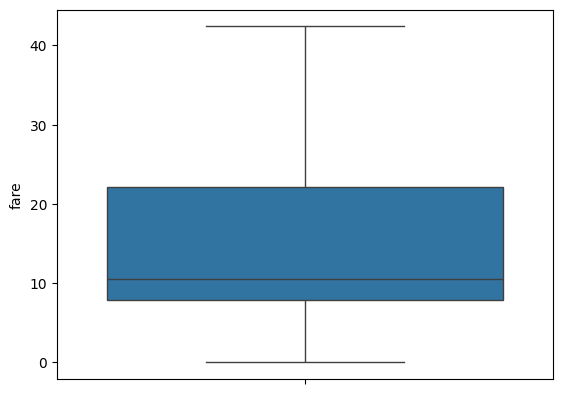

In [325]:
sns.boxplot(data=df, y='fare')

__2. By IQR METHOD__
- IQR stands for Interquartile Range
- It is a measure of statistical dispersion, representing the range within which the middle 50% of the data falls. It's calculated as the difference between the third quartile (Q3) and the first quartile (Q1)

<Axes: ylabel='age'>

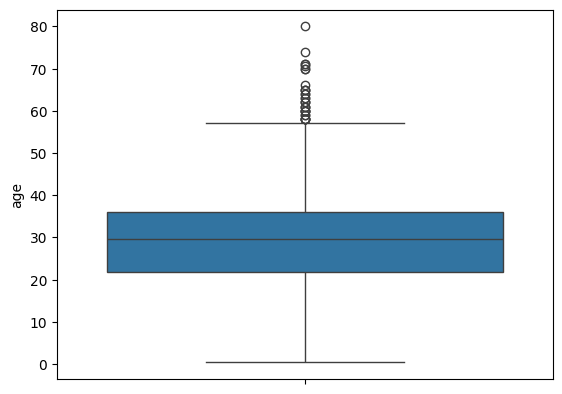

In [326]:
sns.boxplot(data=df2, y='age')

In [327]:
Q1 = df2['age'].quantile(0.25)
Q3 = df2['age'].quantile(0.75)
IQR = Q3 - Q1
IQR

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df2 = df2[(df2['age']<upper_bound)&(df2['age']>lower_bound)]

<Axes: ylabel='age'>

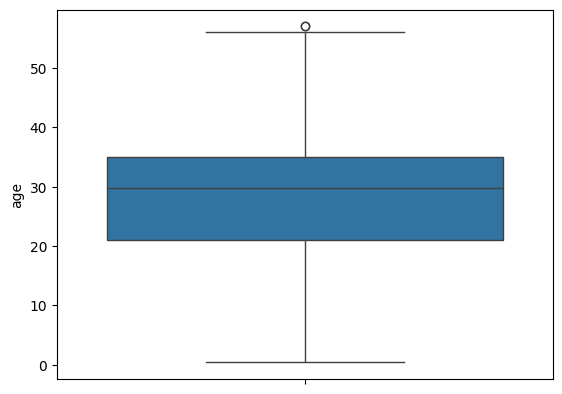

In [328]:
sns.boxplot(data=df2, y='age')

<Axes: ylabel='fare'>

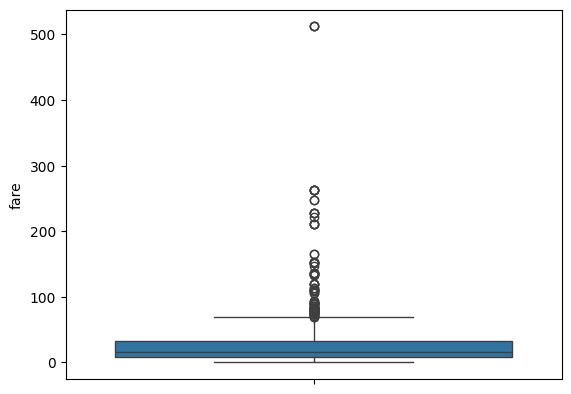

In [329]:
sns.boxplot(data=df2, y='fare')

In [330]:
Q1 = df2['fare'].quantile(0.25)
Q3 = df2['fare'].quantile(0.75)
IQR = Q3 - Q1
IQR

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df2 = df2[(df2['fare']<upper_bound)&(df2['fare']>lower_bound)]

<Axes: ylabel='age'>

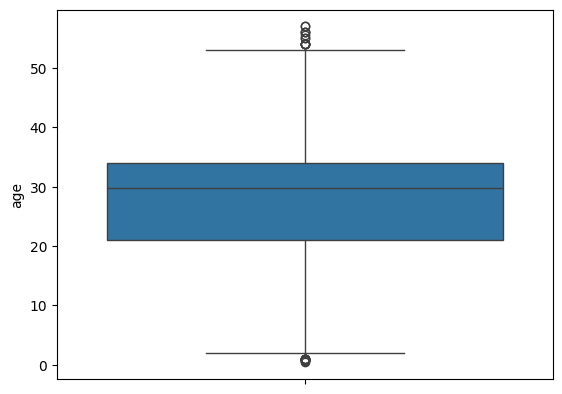

In [331]:
sns.boxplot(data=df2, y='age')

__3. Z SCORE METHOD__

In [332]:
from scipy import stats
import numpy as np

<Axes: ylabel='age'>

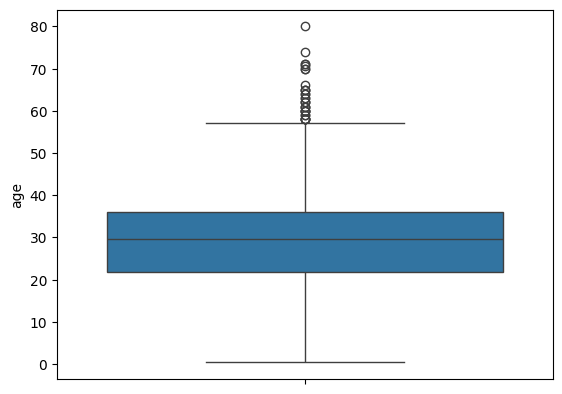

In [333]:
sns.boxplot(data=df3, y='age')

<Axes: ylabel='fare'>

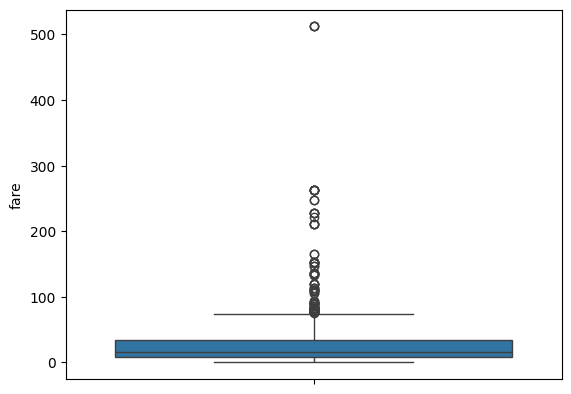

In [334]:
sns.boxplot(data=df3, y='fare')

In [335]:
zscore = np.abs(stats.zscore(df3['age']))
threshold = 3
df3 = df3[(zscore<threshold)]

# The threshold of 3 is used to determine if a data point is an outlier based on its Z-score. If the Z-score is greater than 3, the data point is considered an outlier.


In [336]:
zscore = np.abs(stats.zscore(df3['fare']))
threshold = 3
df3 = df3[(zscore<threshold)]

<Axes: ylabel='age'>

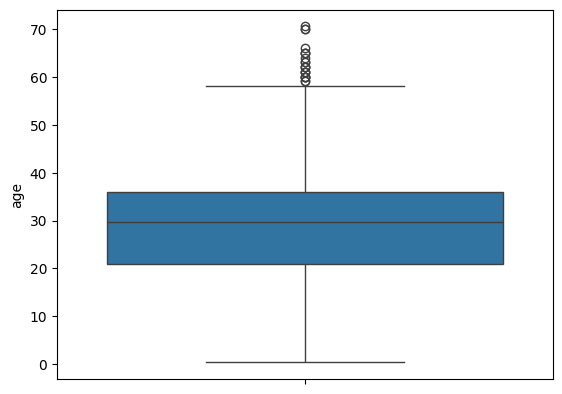

In [337]:
sns.boxplot(data=df3, y= "age")


<Axes: ylabel='fare'>

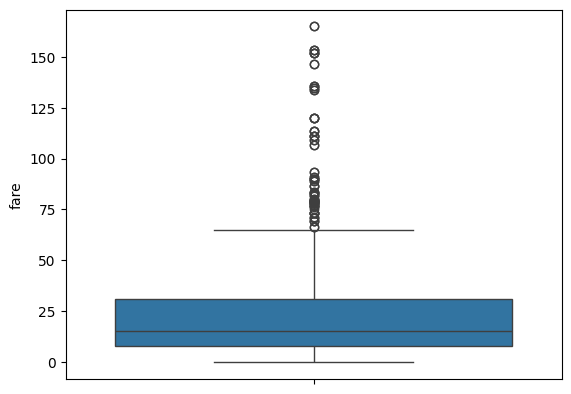

In [338]:
sns.boxplot(data=df3, y= "fare")